<div align="center">
  <h1>EN2550: Assignment 03 on Object Counting on a Conveyor Belt</h1>
  <h2>Name : Tharindu O.K.D<br>
    Index No. : 190622R </h2>
</div>

## Connected Component Analysis

### Read Images

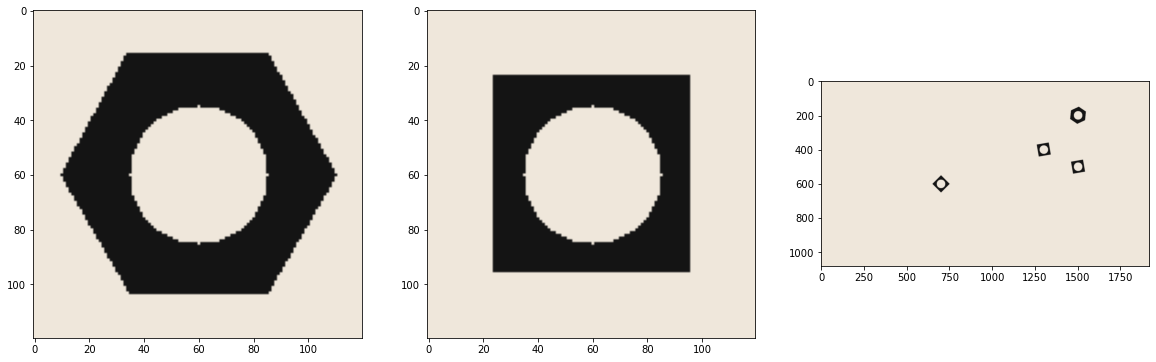

In [150]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3,figsize=(20, 10))
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_BGR2RGB))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_BGR2RGB))
plt.show()

### Thresholding

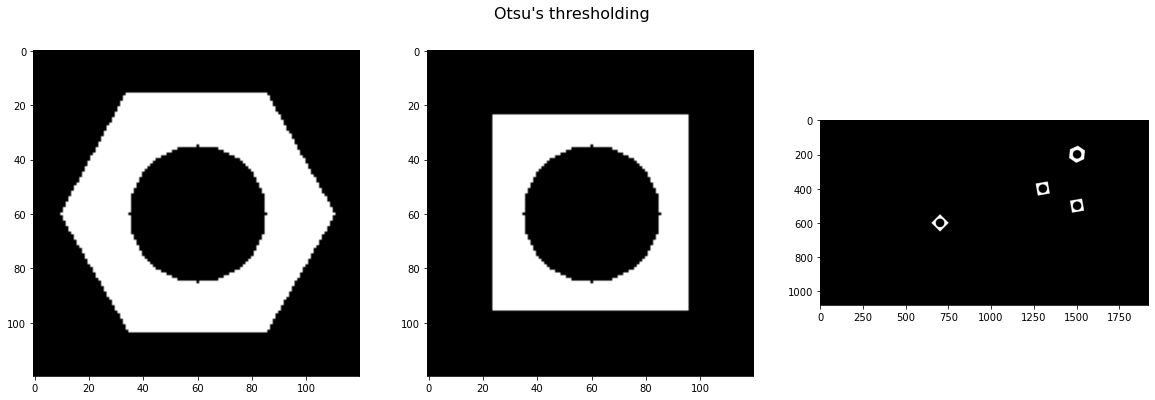

In [172]:
hexnut_ret, hexnut_thresh = cv.threshold(cv.cvtColor(hexnut_template, cv.COLOR_BGR2GRAY), 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)    # thresholding using THRESH_OTSU
squarenut_ret, squarenut_thresh = cv.threshold(cv.cvtColor(squarenut_template, cv.COLOR_BGR2GRAY), 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
conveyor_f100_ret, conveyor_f100_thresh = cv.threshold(cv.cvtColor(conveyor_f100, cv.COLOR_BGR2GRAY), 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

fig, ax = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle("Otsu's thresholding", fontsize=16)
ax[0].imshow(hexnut_thresh, cmap='gray')
ax[1].imshow(squarenut_thresh, cmap='gray')
ax[2].imshow(conveyor_f100_thresh, cmap='gray')
plt.show()

### Morphological Closing

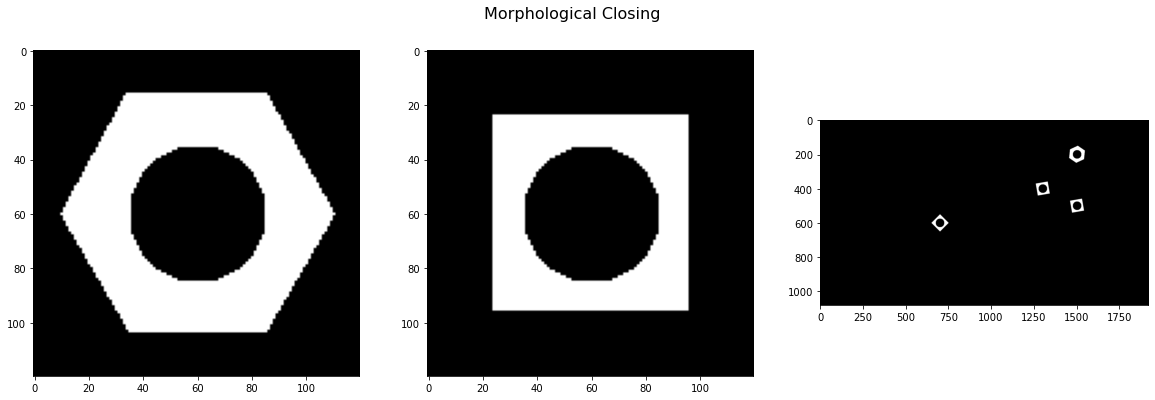

In [173]:
kernel = np.ones((3, 3), np.uint8)
hexnut_closed = cv.morphologyEx(hexnut_thresh, cv.MORPH_CLOSE, kernel)
squarenut_closed = cv.morphologyEx(squarenut_thresh, cv.MORPH_CLOSE, kernel)
conveyor_f100_closed = cv.morphologyEx(conveyor_f100_thresh, cv.MORPH_CLOSE, kernel)

fig, ax = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle("Morphological Closing", fontsize=16)
ax[0].imshow(hexnut_closed, cmap='gray')
ax[1].imshow(squarenut_closed, cmap='gray')
ax[2].imshow(conveyor_f100_closed, cmap='gray')
plt.show()

### Connected Components Analysis

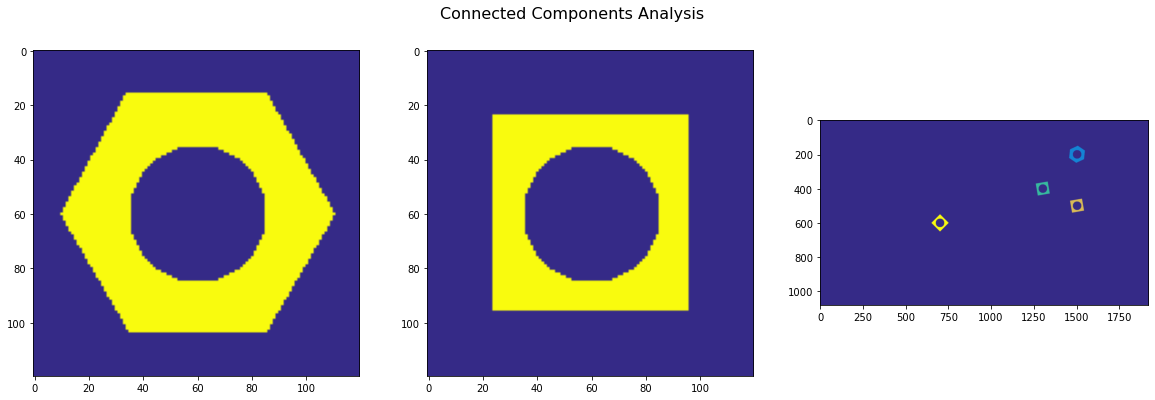

----------------------------------------------------------------------------------------------------
        Hexnut Objects                  Area                                  Centroid
            Background                  9672                 [59.33684864 59.63513234]
              Object 1                  4728                 [59.83375635 59.22356176]
----------------------------------------------------------------------------------------------------
     Squarenut Objects                  Area                                  Centroid
            Background                 11173                   [59.5875772 59.5875772]
              Object 1                  3227                 [59.19677719 59.19677719]
----------------------------------------------------------------------------------------------------
 Conveyor_f100 Objects                  Area                                  Centroid
            Background               2059646               [957.36323524 540.44416273]
 

In [174]:
hexnut_retval, hexnut_labels, hexnut_stats, hexnut_centroids = cv.connectedComponentsWithStats(hexnut_closed)
squarenut_retval, squarenut_labels, squarenut_stats, squarenut_centroids = cv.connectedComponentsWithStats(squarenut_closed)
conveyor_f100_retval, conveyor_f100_labels, conveyor_f100_stats, conveyor_f100_centroids = cv.connectedComponentsWithStats(conveyor_f100_closed)

hexnut_colormap = cv.applyColorMap((hexnut_labels/np.amax(hexnut_labels)*255).astype('uint8'), cv.COLORMAP_PARULA)  #apply colormap
squarenut_colormap = cv.applyColorMap((squarenut_labels/np.amax(squarenut_labels)*255).astype('uint8'), cv.COLORMAP_PARULA)
conveyor_f100_colormap = cv.applyColorMap((conveyor_f100_labels/np.amax(conveyor_f100_labels)*255).astype('uint8'), cv.COLORMAP_PARULA)

fig, ax = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle("Connected Components Analysis", fontsize=16)
ax[0].imshow(cv.cvtColor(hexnut_colormap, cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(squarenut_colormap, cv.COLOR_BGR2RGB))
ax[2].imshow(cv.cvtColor(conveyor_f100_colormap, cv.COLOR_BGR2RGB))
plt.show()

print('-'*100)
print("{:>22}{:>22}{:>42}".format("Hexnut Objects", "Area", "Centroid"))
for i in range(hexnut_retval):
    print("{:>22}{:>22}{:>42}".format("Background" if i == 0 else "Object " + str(i), hexnut_stats[i][cv.CC_STAT_AREA], str(hexnut_centroids[i])))
print('-'*100)
print("{:>22}{:>22}{:>42}".format("Squarenut Objects", "Area", "Centroid"))
for i in range(squarenut_retval):
    print("{:>22}{:>22}{:>42}".format("Background" if i == 0 else "Object " + str(i), squarenut_stats[i][cv.CC_STAT_AREA], str(squarenut_centroids[i])))
print('-'*100)
print("{:>22}{:>22}{:>42}".format("Conveyor_f100 Objects", "Area", "Centroid"))
for i in range(conveyor_f100_retval):
    print("{:>22}{:>22}{:>42}".format("Background" if i == 0 else "Object " + str(i), conveyor_f100_stats[i][cv.CC_STAT_AREA], str(conveyor_f100_centroids[i])))
print('-'*100)

* In the hexnut and squarenut images, we get total 2 connected components and in the conveyor_f100 image we get 5 connected components. In each image, background is assigned as label 0.
* Statistics are the properties of each connected componnets. There are 5 properties we can get from this list.
    * <code>CC_STAT_LEFT</code> : The leftmost (x) coordinate which is the inclusive start of the bounding box in the horizontal direction.
    * <code>CC_STAT_TOP</code> : The topmost (y) coordinate which is the inclusive start of the bounding box in the vertical direction.
    * <code>CC_STAT_WIDTH</code> : The horizontal size of the bounding box.
    * <code>CC_STAT_HEIGHT</code> : The vertical size of the bounding box.
    * <code>CC_STAT_AREA</code> : The total area (in pixels) of the connected component.
* Centroids are the center cordinates of each connected contours.

As you can see from the above table, hexnut has an area about 4728 and squarenut has an area about 3227. Also we can see that in the conveyor_f100 image, there is a hexnut and 3 squarenuts. This can also be seen from the objects areas. Object1 has 4636 area which is close to hexnut area and other 3 objects have area close to squarenut area. 

### Contour Analysis

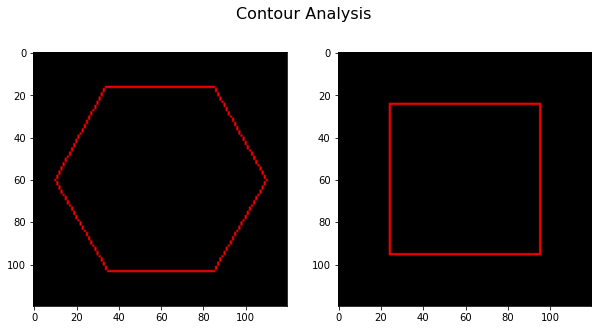

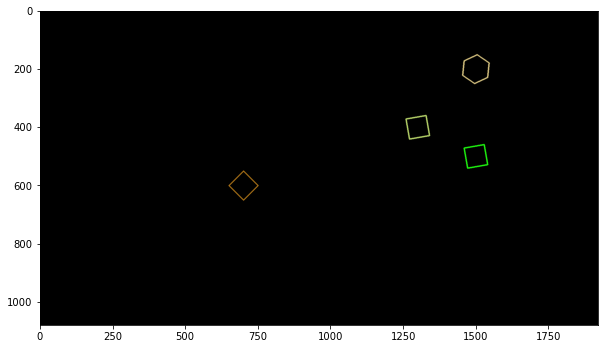

In [187]:
import random as rng
_, hexnut_contours, hexnut_template_hierarchy= cv.findContours(hexnut_closed, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
hexnut_contour = hexnut_contours[0] # contour corresponding to hexnut

_, squarenut_contours, squarenut_template_hierarchy= cv.findContours(squarenut_closed, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
squarenut_contour = squarenut_contours[0] # contour corresponding to squarenut

_, conveyor_f100_contours, conveyor_f100_contours_hierarchy= cv.findContours(conveyor_f100_closed, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

img_hexnut = np.zeros(hexnut_template.shape, dtype=np.uint8)
cv.drawContours(img_hexnut, hexnut_contours, -1, (0, 0, 255))  
img_squarenut = np.zeros(hexnut_template.shape, dtype=np.uint8)
cv.drawContours(img_squarenut, squarenut_contours, -1, (0, 0, 255)) 
img_conveyor = np.zeros(conveyor_f100.shape, dtype=np.uint8)
for i in range(len(conveyor_f100_contours)):
        color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
        cv.drawContours(img_conveyor, conveyor_f100_contours, i, color, 3)       # applying random color for each contour

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("Contour Analysis", fontsize=16)
ax[0].imshow(cv.cvtColor(img_hexnut, cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(img_squarenut, cv.COLOR_BGR2RGB))
plt.show()
fig, ax = plt. subplots(figsize=(10, 10))
ax.imshow(cv.cvtColor(img_conveyor, cv.COLOR_BGR2RGB))
plt.show()

## Detecting Objects on a Synthetic Conveyor

### Count the number of matching hexagonal nuts

In [155]:
count = 0
for cnt in conveyor_f100_contours:
    ret = cv.matchShapes(cnt,hexnut_contour,1,0.0)
    if (ret < 0.001): # I have chosen 0.001 as the thresholding value
        count += 1
        
print("Number of hexagonal nuts in conveyor_f100 image :", count)

Number of hexagonal nuts in conveyor_f100 image : 1


### Playing video

In [156]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break
cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.


### Count the number of objects that were conveyed along the conveyor belt

**Method**
1. First, threshold the frame, carry out morphology, and then find the contours as did in above.
2. Compare the contour area in order to disregard partially appearing nuts and match the contours using <code>cv.matchShapes()</code> with hexnut or squarenut.
3. After identifying the correct contour, append its y-coordinate (horizontal) to <code>contour_y</code> dictionary.
4. Then, for each y-coordinate in <code>contour_y</code>, if the y-coordinate is greater than the previous maximum, increment the total count by 1.
5. Update the <code>maximum_y</code>.

In [163]:
# Yor code here.
frame_array = []
shape = (1080, 1920, 3)
cap = cv.VideoCapture('conveyor.mp4')

maximum_y = {'hexnut':0, 'squarenut':0}     # dictionary for store the maximum y-distance (horizontal) in previous frame.
total = {'hexnut':0, 'squarenut':0}      # dictionary for stores the total each nuts
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    conveyor_ret, conveyor_thresh = cv.threshold(cv.cvtColor(frame, cv.COLOR_BGR2GRAY), 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
    conveyor_closed = cv.morphologyEx(conveyor_thresh, cv.MORPH_CLOSE, kernel)
    _, conveyor_contours, conveyor_contours_hierarchy= cv.findContours(conveyor_closed, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    cv.drawContours(frame, conveyor_contours, -1, (0,255,0), 3)
    contour_y = {'hexnut':[], 'squarenut':[]}
    count = {'hexnut':0, 'squarenut':0}
    for cnt in conveyor_contours:
        ret = cv.matchShapes(cnt, hexnut_contour, 1, 0.0)
        if (ret < 0.001):
            M = cv.moments(cnt)
            if (M['m00']>5000):
                count['hexnut'] += 1
                contour_y['hexnut'].append(int(M['m10']/M['m00']))

        ret = cv.matchShapes(cnt, squarenut_contour, 1, 0.0)
        if (ret < 0.001):
            M = cv.moments(cnt)
            if (M['m00']>3000):
                count['squarenut'] += 1
                contour_y['squarenut'].append(int(M['m10']/M['m00']))
    
    frame_maximum = {'hexnut':0, 'squarenut':0}
    for nut in ['hexnut','squarenut']:
        for y in contour_y[nut]:
            frame_maximum[nut] = max(frame_maximum[nut], y)
            if maximum_y[nut] < y:
                total[nut] += 1
        maximum_y[nut] = frame_maximum[nut]

    text = 'Hexnut count in frame       = ' + str(count['hexnut']) +    "      Total hexnut nuts        = " + str(total['hexnut'])
    cv.putText(frame, text , (100, 50), cv.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 1, cv.LINE_AA)
    text = 'Squarenut count in frame    = ' + str(count['squarenut']) + "       Total squarenut nuts    = " + str(total['squarenut'])
    cv.putText(frame, text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 1, cv.LINE_AA)
    text = 'Total nuts = ' + str(total['hexnut'] + total['squarenut'])
    cv.putText(frame, text , (100, 150), cv.FONT_HERSHEY_COMPLEX, 1, (255, 0, 0), 1, cv.LINE_AA)
    frame_array.append(frame)
cap.release()
out = cv.VideoWriter('./conveyor_result_190622R.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0]))
for i in range(len(frame_array)):
    cv.imshow('Frame', frame_array[i])
    if cv.waitKey(1) == ord('q'):
        break
    out.write(frame_array[i])

out.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.
